In [2]:
# импорт библиотек, классов, методов
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [7]:
# считываем данные в переменную по url методом библ.Pandas
stat_data = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

In [9]:
# выводим dataframe для посмотреть
stat_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# чекаем незаполненные ячейки (na/NaN)
stat_data.isna().values.any()

False

In [20]:
# сплитим дынные методом pd.drop() на X - все признаки без переменной класса, y - только переменная класса; выводим X/y
X = stat_data.drop(columns = 'target')
y = stat_data['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
# создаём экземпляр класса эстиматора "рандомный лес" без параметров
rf = RandomForestClassifier()
# задаём параметры для GridSearchCV: кол-во эстиматоров (деревьев), метод энтропии, максимальная глубина дерева, минимальные параметры сэмплов для сплита
parametrs = {'n_estimators': [10, 12, 15], 'criterion': ['entropy'], 'max_depth': [2, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 4, 6]}
# создаём экземпляр класса поиска лучших параметров из заданных, помещаем эстиматор, параметры, задаём k-fold уровень валидации
gs_cv_clf = GridSearchCV(rf, parametrs, cv = 5)
# фитим тренировочными данными, происходит обучение и выбор лучших параметров
gs_cv_clf.fit(X, y)
# выводим лучшие параметры для посмотреть
gs_cv_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [31]:
# сохраняем в переменную лучшие параметры для рандомного леса
best_clf = gs_cv_clf.best_estimator_
# сохраняем в переменную вес фич(признаков определяемого класса) для нашего случая
feature_importances = best_clf.feature_importances_
#создаем датафрейм из словаря с колонками фич и веса фич для более удобного восприятия
feature_importances_df = pd.DataFrame({'features': list(X), 'feature_importances': feature_importances})
# присваиваем переменной DF с сортировкой веса фичи по убыванию (метод Pandas)
fi_df_sort = feature_importances_df.sort_values('feature_importances', ascending = False)
# выводим переменную (датафрейм), смотрим какие фичи больше влияют на снижение энтропии
fi_df_sort

,features,feature_importances
2,cp,0.278210
12,thal,0.227146
9,oldpeak,0.160867
11,ca,0.100926
8,exang,0.073886
4,chol,0.054782
7,thalach,0.049835
10,slope,0.030603
1,sex,0.019340
0,age,0.004405


<AxesSubplot:>

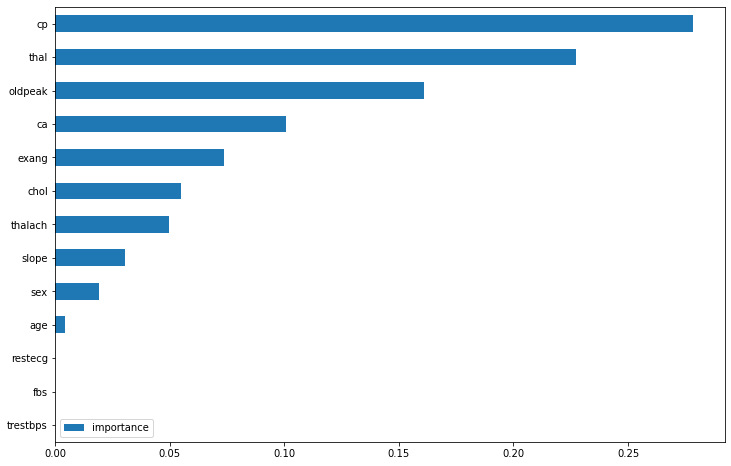

In [46]:
# код для вывода графика важности фичей
imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))